# Atahar Imtiaz

## Research question/interests

Briefly describe your research question or interests here.

#Premier League Players

**Our data works with Goals(denoted as G), Expected Goals(denoted as xG), Assists(denoted as A), Expected Assists(denoted as xA), Goals per 90 minutes(denoted as xG90), Assists per 90 minutes(denoted as xA90).
Our goal is to find the correlation between G and xG, A and xA, and how xA90 contributes to xG90 and overall the coherency of the data.**

Each of us will be working with different sets of the data present, where my accountability would be for the relation between A and xA, how both of these sets of data correlate to each other.


In [42]:
import pandas as pd 
df = (pd.read_csv('../data/processed/Premier_League_players.xlsx.csv')
      .dropna()
      .reset_index(drop=True)
     ) 
df.head(10)

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
5,6,Kevin De-Bruyne,Manchester City,30,2214,15,8,5.95,9.05,11.26,-3.26,0.24,0.46
6,7,Jamie Vardy,Leicester,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,8,Diogo Jota,Liverpool,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,9,Wilfried Zaha,Crystal Palace,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16
9,10,Raheem Sterling,Manchester City,30,2119,13,5,15.78,-2.78,5.02,-0.02,0.67,0.21


In [43]:
df.shape


(537, 13)

In [44]:
df = (
    df
    .drop(['№', 'Apps','Min', 'G', 'xG', 'G - xG', 'xG90', 'xA90'], axis=1)
    .reset_index(drop=True)
)
df.head(10)

,Player,Team,A,xA,xA - A
0,Son Heung-Min,Tottenham,7,7.85,-0.85
1,Mohamed Salah,Liverpool,13,9.79,3.21
2,Cristiano Ronaldo,Manchester United,3,4.42,-1.42
3,Harry Kane,Tottenham,9,9.82,-0.82
4,Sadio Mané,Liverpool,2,5.27,-3.27
5,Kevin De-Bruyne,Manchester City,8,11.26,-3.26
6,Jamie Vardy,Leicester,2,1.61,0.39
7,Diogo Jota,Liverpool,4,5.87,-1.87
8,Wilfried Zaha,Crystal Palace,1,4.89,-3.89
9,Raheem Sterling,Manchester City,5,5.02,-0.02


In [45]:
df.shape

(537, 5)

C:\Users\ataha\AppData\Local\Temp\ipykernel_25856\3218420995.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.corr()


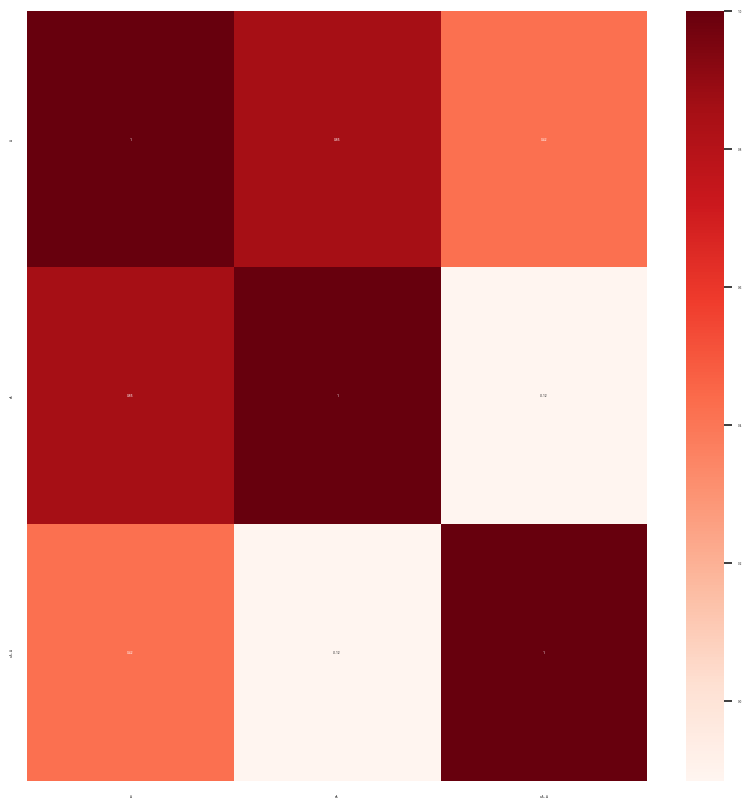

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
df2 = df.corr()
sns.heatmap(df2, annot=True, cmap=plt.cm.Reds)
plt.show()


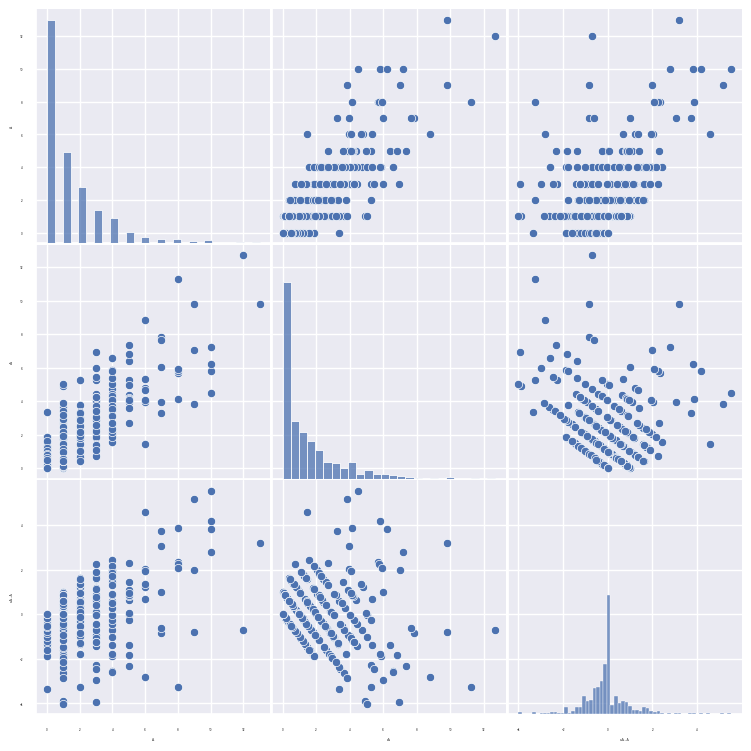

In [50]:
sns.pairplot(df)

In [48]:
df.isna()

,Player,Team,A,xA,xA - A
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
532,False,False,False,False,False
533,False,False,False,False,False
534,False,False,False,False,False
535,False,False,False,False,False


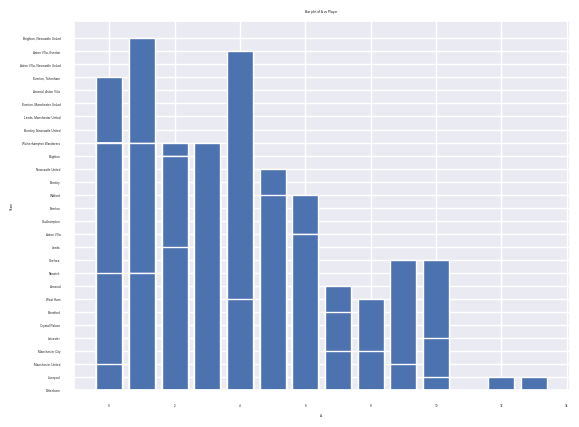

In [33]:
plt.bar(df['A'], df['Team'])

plt.xlabel('A')
plt.ylabel('Team')
plt.title('Bar plot of A vs Player')

plt.show()

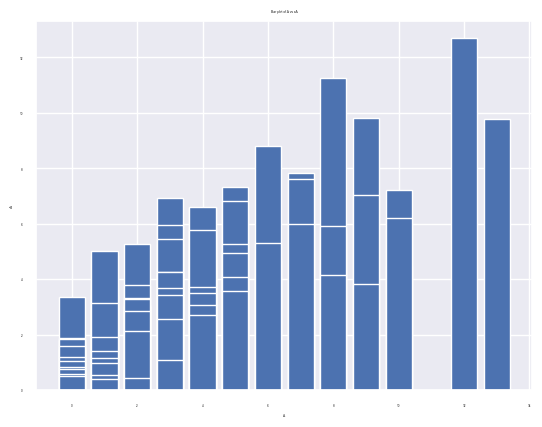

In [34]:
plt.bar(df['A'], df['xA'])

plt.xlabel('A')
plt.ylabel('xA')
plt.title('Bar plot of A vs xA')

plt.show()

In [35]:
df = df.sort_values('A', ascending=False).reset_index(drop=True)

In [36]:
print(df['A'])

0      13
1      12
2      10
3      10
4      10
       ..
532     0
533     0
534     0
535     0
536     0
Name: A, Length: 537, dtype: int64


In [37]:
df = df[['Player', 'A', 'xA', 'xA - A']]
df2 = df.iloc[:50, :]
df2 = df2.reset_index(drop=True)

In [38]:
print(df2)

                    Player   A     xA  xA - A
0            Mohamed Salah  13   9.79    3.21
1   Trent Alexander-Arnold  12  12.69   -0.69
2              Mason Mount  10   7.21    2.79
3            Harvey Barnes  10   4.48    5.52
4         Andrew Robertson  10   6.20    3.80
5             Jarrod Bowen  10   5.82    4.18
6              Reece James   9   7.03    1.97
7               Paul Pogba   9   3.84    5.16
8               Harry Kane   9   9.82   -0.82
9          Michail Antonio   8   5.77    2.23
10         Kevin De-Bruyne   8  11.26   -3.26
11          James Maddison   8   5.67    2.33
12        Dejan Kulusevski   8   4.15    3.85
13           Gabriel Jesus   8   5.91    2.09
14            João Cancelo   7   6.01    0.99
15     Alexandre Lacazette   7   3.26    3.74
16            Bryan Mbeumo   7   3.96    3.04
17           Son Heung-Min   7   7.85   -0.85
18             Bukayo Saka   7   7.63   -0.63
19         Emmanuel Dennis   6   3.96    2.04
20              Danny Ings   6   1

<AxesSubplot:xlabel='xA', ylabel='count'>

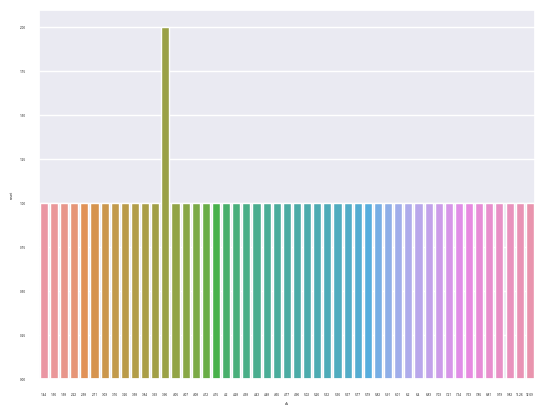

In [39]:
sns.countplot(x=df2["xA"])

<AxesSubplot:xlabel='count', ylabel='A'>

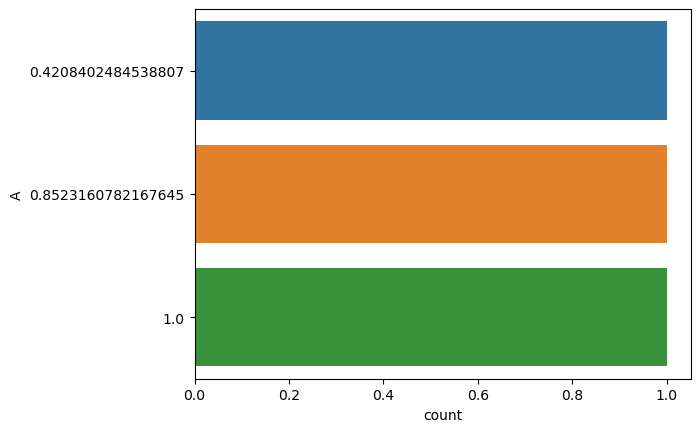

In [8]:
sns.countplot(y=df2["A"])

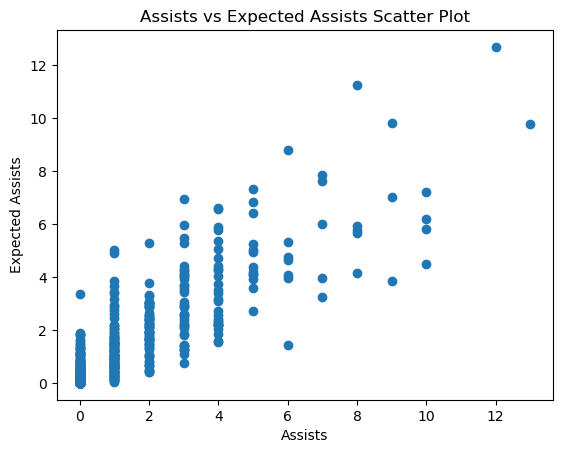

In [9]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('Expected Assists')

plt.title('Assists vs Expected Assists Scatter Plot')

plt.show()

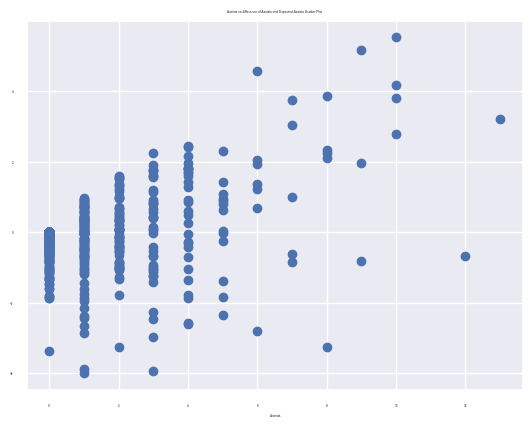

In [30]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('')

plt.title('Assists vs difference of Assists and Expected Assists Scatter Plot')

plt.show()

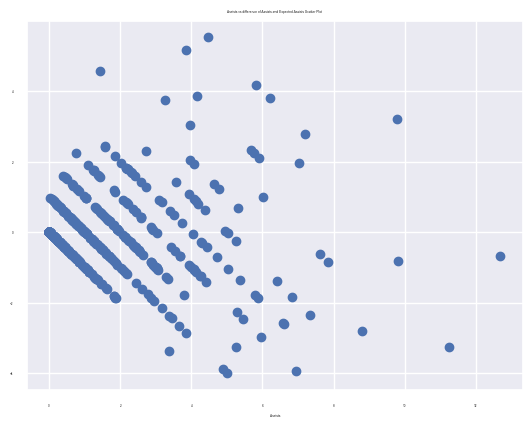

In [31]:
import matplotlib.pyplot as plt

x = df['xA']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('')

plt.title('Assists vs difference of Assists and Expected Assists Scatter Plot')

plt.show()

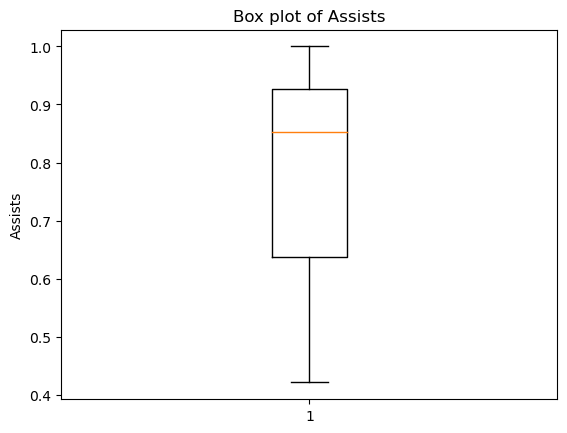

In [12]:
data = df2['A']

plt.boxplot(data)

plt.ylabel('Assists')

plt.title('Box plot of Assists')

plt.show()

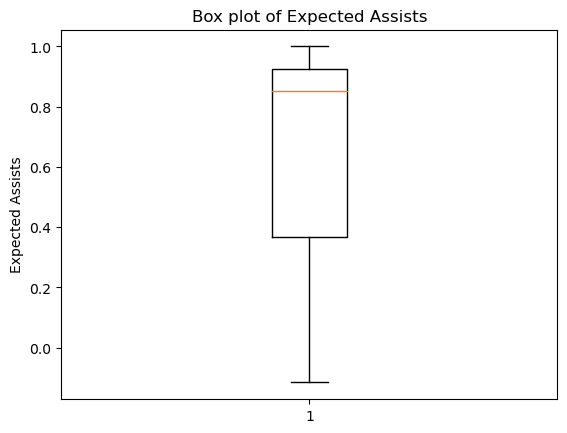

In [13]:
data = df2['xA']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of Expected Assists')

plt.show()

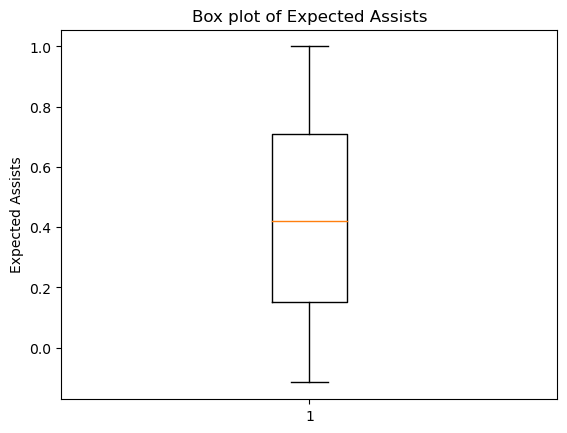

In [14]:
data = df2['xA - A']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of Expected Assists')

plt.show()

<AxesSubplot:xlabel='A', ylabel='count'>

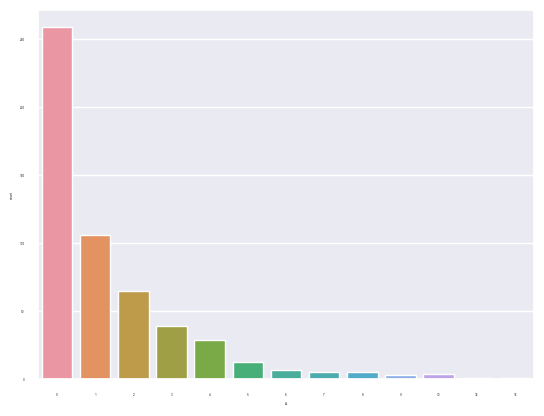

In [40]:
sns.countplot(x=df["A"])

<AxesSubplot:xlabel='count', ylabel='xA'>

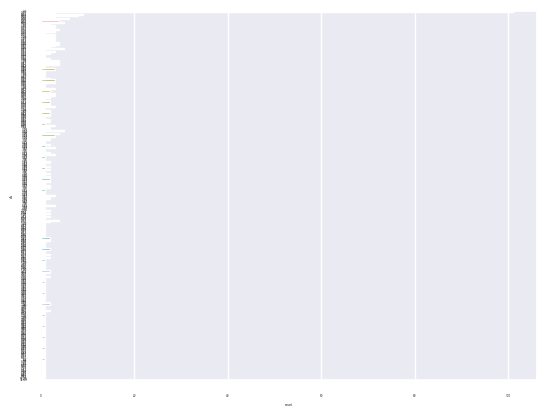

In [41]:
sns.countplot(y=df["xA"])

<AxesSubplot:xlabel='count', ylabel='xA'>

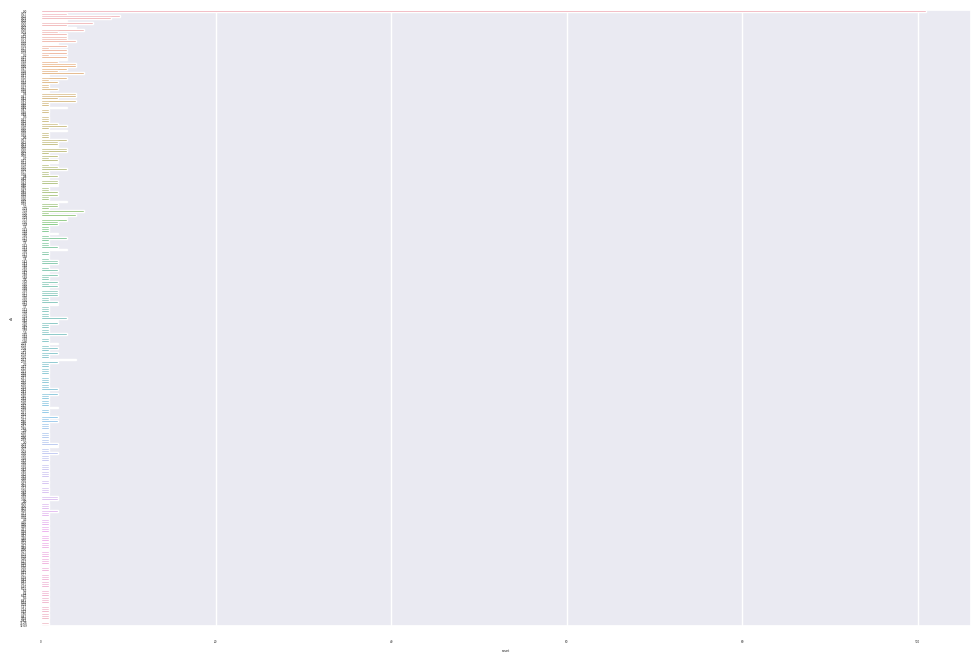

In [26]:
sns.set(font_scale=0.2)
plt.figure(figsize=(12,8))
sns.countplot(y=df["xA"])

<AxesSubplot:xlabel='count', ylabel='xA - A'>

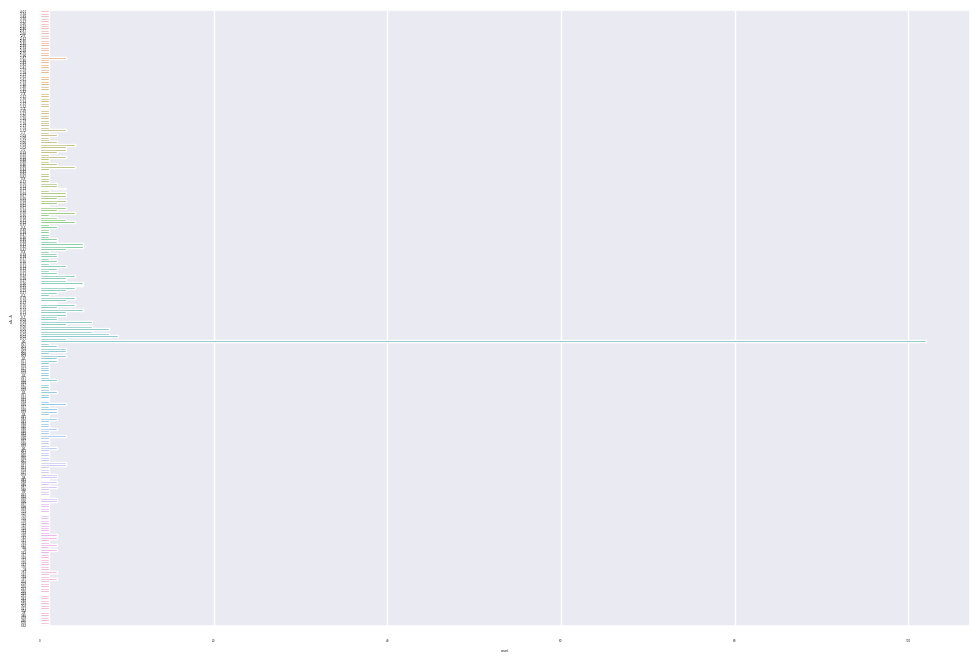

In [27]:
sns.set(font_scale=0.2)
plt.figure(figsize=(12,8))
sns.countplot(y=df["xA - A"])

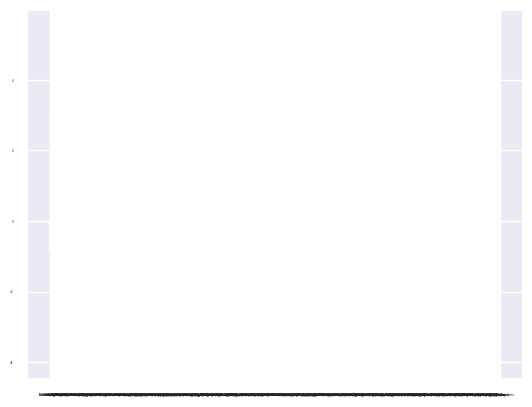

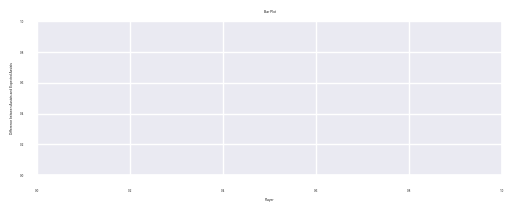

In [28]:
import matplotlib.pyplot as plt

x = df['Player']
y = df['xA - A']

plt.bar(x, y)

plt.figure(figsize=(6,2))

plt.xlabel('Player')

plt.ylabel('Difference between Assists and Expected Assists')

plt.title('Bar Plot')

plt.show()